# Центральная предельная теорема

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from math import sqrt
import random
%matplotlib inline
random.seed(1)

Добрый день! Сегодня мы разберемся с тем, что такое центральная предельная теорема и посмотрим - дейтвительно ли она работает. Для этого эксперимента нужно выбрать какое-нибудь интересное распределение наименее похожее на нормальное. Я решил выбрать бета распределение с параметрами alpha = 0.5 и beta = 0.5, как вы увидите дальше, оно **очень** не похоже на нормальное. Бета распределение с этими параметрами скорее напоминает перевернутую шляпу или даже перевернутый колпак.)

Созданим само бета распределение и выборку из него с n = 1000

In [2]:
beta_rv = stats.beta(0.5,0.5)
sample_beta = beta_rv.rvs(1000)

Построем сглаженную функцию плотности для выборки (KDE), теоретическую плотность для данного распределения и гистограмму.

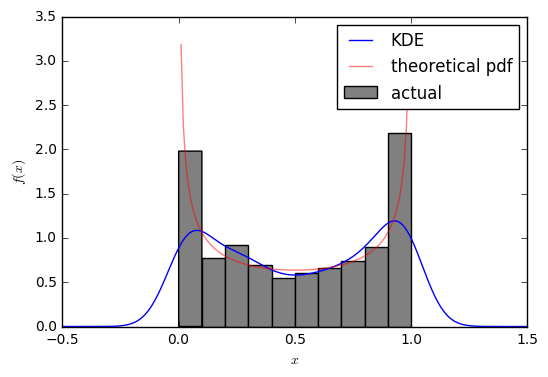

In [3]:
x = np.linspace(0,1,100)
pdf = beta_rv.pdf(x)

df = pd.DataFrame(sample_beta, columns=['KDE'])
ax = df.plot(kind='density')

plt.plot(x, pdf, label='theoretical pdf',c='r',alpha=0.5)
plt.hist(sample_beta,normed=True,color='grey',label='actual')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Такое вот распределение.)

Думаю, что не лишним будет еще раз записать саму центральную предельную теорему в явном виде. Пусть X1,X2, ..., Xn - это случайная выборка из некой генеральной совокупности со стредним арифметическим (мат. ожиданем) mu и дисперсией sigma^2, тогда для достаточно больших n:

$$ \bar{X} \backsim N(\mu,\frac{\sigma^2}{n})  $$ ,

даже если распределение значений в генеральной совокупности отлично от нормального.

Эту формулу нужно читать как "распределение средних значений X близко к нормальному со средним арифметическим мю и дисперсией сигма в квадрате". Кстати сигму в записи центральной предельной теоремы называют так же стандартной ошибкой среднего.

Вернемся к распределению, которое выбрал я - бета распределению. Для него среднее и дисперсия определены следующим образом: 

$$\mu = \frac{\alpha}{\alpha + \beta} $$ 

$$\sigma^2 = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta +1)} $$


Рассчитаем эти параметры, чтобы сравнивать получаемые опытным путем параметры с правилами центральной предельной теоремы.

In [4]:
a, b = 0.5, 0.5

In [5]:
MU = a/(a+b)
VAR = (a*b)/(((a+b)**2)*(a+b+1))
SIGMA = sqrt(VAR)
MU, SIGMA

(0.5, 0.3535533905932738)

Теперь напишу функцию для генерации выборок и подсчета выборочных средних. В вывод так же включу теоретические и приближенные значения параметров, а так же график теоретического нормального распределения.

In [6]:
def clt(sample,sub_sample_size,n_sub_samples=1000):
    means = []
    for i in range(n_sub_samples):
        sub_sample = sample[np.random.randint(0,len(sample),sub_sample_size)]
        means.append(np.mean(sub_sample))
        
    mu = np.mean(means)
    sigma = np.std(means,ddof=1)
    SE = SIGMA/sqrt(sub_sample_size) # стандартная ошибка среднего
    
    norm_rv = stats.norm(MU,SE)
    
    print 'Теоретическое среднее vs приближенное: {:.2f} vs {:.2f}'.format(MU,mu)
    print 'Теоретическое стандартное откл. vs приближенное: {:.2f} vs {:.2f}'.format(SE,sigma)
    print 'Приближенное среднее 95% доверительный интервал = {:.2f} +/- {:.2f}'.format(mu,2*SE)
    
    plt.hist(means,normed=True,label='actual')
    plt.plot(x,norm_rv.pdf(x),label='theoretical')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

Запустим эту функцию для n = 5, 10 и 50.

Теоретическое среднее vs приближенное: 0.50 vs 0.50
Теоретическое стандартное откл. vs приближенное: 0.16 vs 0.16
Приближенное среднее 95% доверительный интервал = 0.50 +/- 0.32


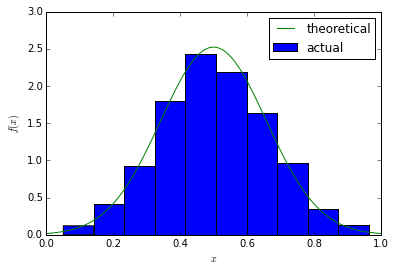

In [7]:
clt(sample_beta,5)

Теоретическое среднее vs приближенное: 0.50 vs 0.50
Теоретическое стандартное откл. vs приближенное: 0.11 vs 0.11
Приближенное среднее 95% доверительный интервал = 0.50 +/- 0.22


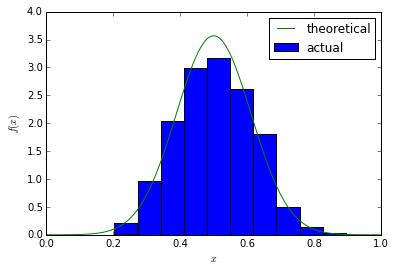

In [8]:
clt(sample_beta,10)

Теоретическое среднее vs приближенное: 0.50 vs 0.50
Теоретическое стандартное откл. vs приближенное: 0.05 vs 0.05
Приближенное среднее 95% доверительный интервал = 0.50 +/- 0.10


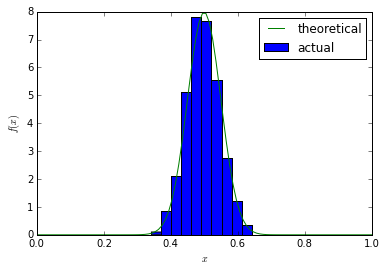

In [9]:
clt(sample_beta,50)

Глядя на эти графики видно:

1. Центральная предельная теорема действительно рабоет, и это приводит меня в неописуемый восторг!
2. Даже при маленьком размере выбрки среднее уже неплохо приближено.
3. Увеличение n "уплотняет" распределение выборочных средних, что говорит нам об увеличение точности оценки. В цифровом виде это можно выразить через доверительный интервал - видно, что с увеличением n он сужается.

Спасибо за внимание!